# Análise palavras fontes de dados

In [1]:
from explore.informacoes_fontes_dados import obter_informacoes_palavras
from explore.estatistica_palavras import AnaliseEstatisticaPalavras
from explore.grafico_palavras import AnaliseGraficaPalavras
from explore.nuvem_palavras import AnaliseNuvemPalavras

from util import constants

In [2]:
import seaborn as sns
sns.set_theme()

## Análises gráficas de palavras de fontes de dados

## Análise palavras - Nerds Viajantes

In [3]:
informacoes_fonte_de_dados = obter_informacoes_palavras(constants.WIKIPEDIA)

/home/helder/estudos/tcc-pucmg-2/src/python/notebooks/explore/informacoes_fontes_dados.py:40: RuntimeWarning: invalid value encountered in true_divide
  percentual_nao_verbo = 100 * (np.array(tamanhos_sem_verbo) / np.array(tamanhos_documentos))
/home/helder/estudos/tcc-pucmg-2/src/python/notebooks/explore/informacoes_fontes_dados.py:45: RuntimeWarning: invalid value encountered in true_divide
  percentual_nao_verbo_sw = 100 * (np.array(tamanhos_sem_verbo_sw) / np.array(tamanhos_documentos))


In [4]:
informacoes_fonte_de_dados.head(5)

,documento,tamanho,documento_nao_verbo,tamanho_sem_verbo,percentual_nao_verbo,documento_nao_verbo_sw,tamanho_sem_verbo_sw,percentual_nao_verbo_sw
0,"[geograf, argentin, domíni, estud, conhec, sob...",1163,"[geograf, argentin, domíni, tod, caracterís, g...",764,65.692175,"[geograf, argentin, domíni, tod, caracterís, g...",764,65.692175
1,"[banc, namuncur, banc, burdwood, plataform, su...",37,"[namuncur, burdwood, plataform, subaquá, 150, ...",22,59.459459,"[namuncur, burdwood, plataform, subaquá, 150, ...",22,59.459459
2,"[camp, gel, sul, patagón, castelh, hiel, conti...",181,"[sul, patagón, castelh, hiel, continent, hiel,...",116,64.088398,"[sul, patagón, castelh, hiel, continent, hiel,...",116,64.088398
3,"[pic, glór, morr, cerr, próx, cidad, argentin,...",203,"[glór, próx, cidad, argentin, mendoz, quas, ch...",113,55.665025,"[glór, próx, cidad, argentin, mendoz, quas, ch...",113,55.665025
4,"[chac, austr, trê, princip, divis, chac, porç,...",62,"[chac, austr, trê, princip, chac, porç, merid,...",41,66.129032,"[chac, austr, trê, princip, chac, porç, merid,...",41,66.129032


## Análise fonte de dados selecionada

In [5]:
analise_grafica = AnaliseGraficaPalavras(informacoes_fonte_de_dados)

### Distribuição de percentuais de tokens não verbo no documento

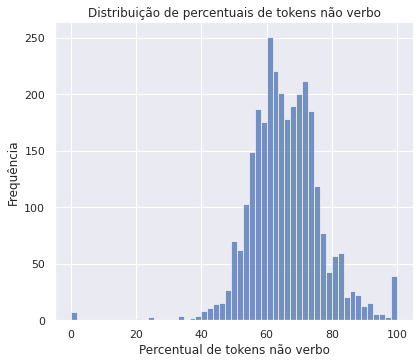

In [6]:
analise_grafica.analisar_distribuicao_percentual('percentual_nao_verbo', xlabel="Percentual de tokens não verbo", 
    ylabel="Frequência", title='Distribuição de percentuais de tokens não verbo')

### Distribuição de percentuais de tokens não verbo nem stopwords no documento

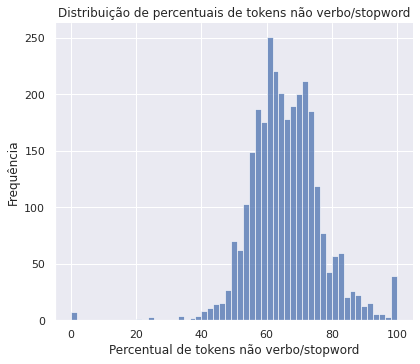

In [7]:
analise_grafica.analisar_distribuicao_percentual('percentual_nao_verbo_sw', xlabel="Percentual de tokens não verbo/stopword", ylabel="Frequência", 
    title='Distribuição de percentuais de tokens não verbo/stopword')

### Distribuição de tamanho de documento

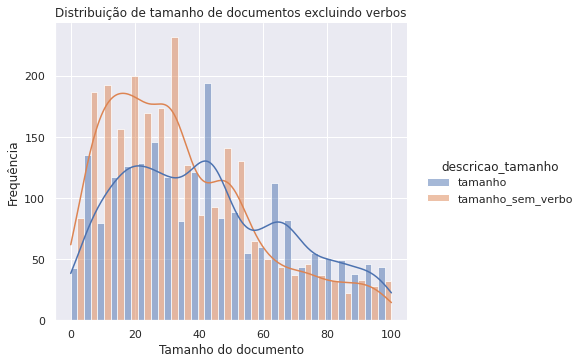

In [37]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo', xlabel='Tamanho do documento', 
    ylabel='Frequência', title='Distribuição de tamanho de documentos excluindo verbos', x_max=100)

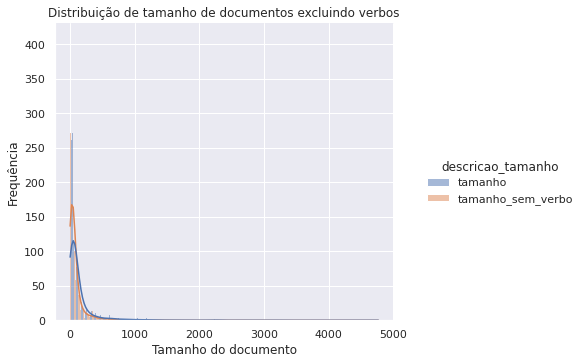

In [38]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo', xlabel='Tamanho do documento', 
    ylabel='Frequência', title='Distribuição de tamanho de documentos excluindo verbos')

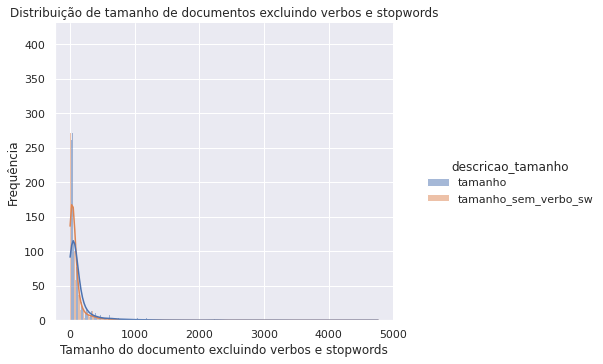

In [9]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo_sw', xlabel='Tamanho do documento excluindo verbos e stopwords', 
    ylabel='Frequência', title='Distribuição de tamanho de documentos excluindo verbos e stopwords')

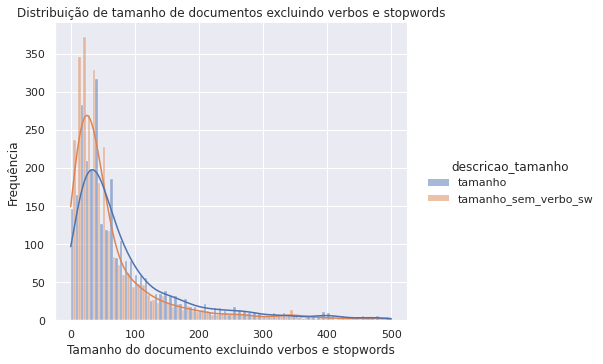

In [10]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo_sw', xlabel='Tamanho do documento excluindo verbos e stopwords', 
    ylabel='Frequência', title='Distribuição de tamanho de documentos excluindo verbos e stopwords', x_max=500)

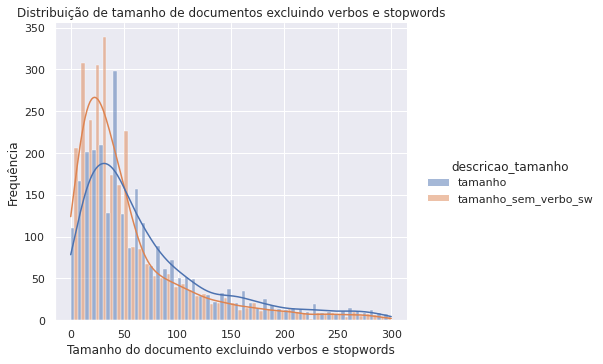

In [11]:
analise_grafica.analisar_distribuicao_tamanhos_documentos('tamanho_sem_verbo_sw', xlabel='Tamanho do documento excluindo verbos e stopwords', 
    ylabel='Frequência', title='Distribuição de tamanho de documentos excluindo verbos e stopwords', x_max=300)

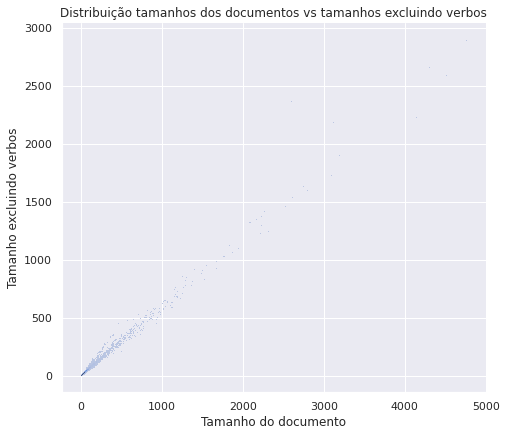

In [12]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo', bidimensional=True, 
xlabel='Tamanho do documento', ylabel='Tamanho excluindo verbos', 
title='Distribuição tamanhos dos documentos vs tamanhos excluindo verbos')

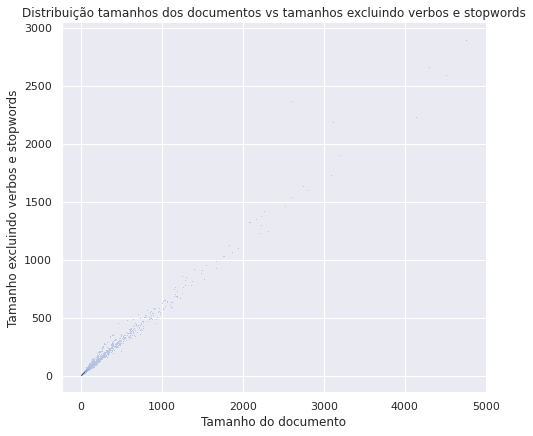

In [13]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo_sw', bidimensional=True, 
xlabel='Tamanho do documento', ylabel='Tamanho excluindo verbos e stopwords', 
title='Distribuição tamanhos dos documentos vs tamanhos excluindo verbos e stopwords')

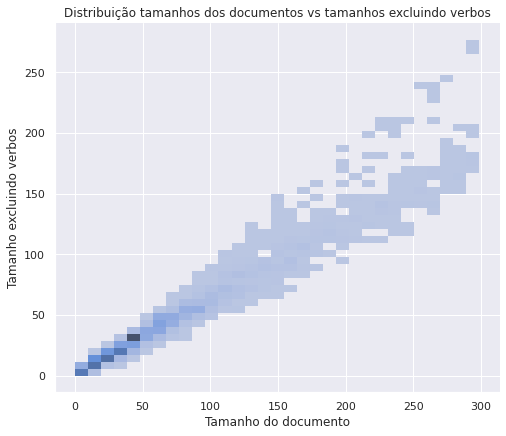

In [14]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo', bidimensional=True, x_max=300, 
xlabel='Tamanho do documento', ylabel='Tamanho excluindo verbos', 
title='Distribuição tamanhos dos documentos vs tamanhos excluindo verbos')

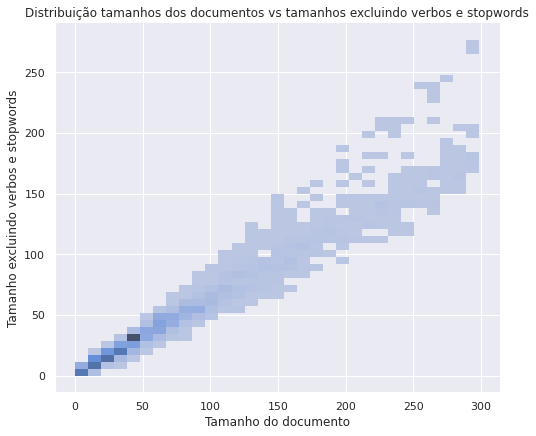

In [15]:
analise_grafica.analisar_distribuicao_tamanhos_documentos(coluna_tamanho='tamanho_sem_verbo_sw', bidimensional=True, x_max=300, 
xlabel='Tamanho do documento', ylabel='Tamanho excluindo verbos e stopwords', 
title='Distribuição tamanhos dos documentos vs tamanhos excluindo verbos e stopwords')

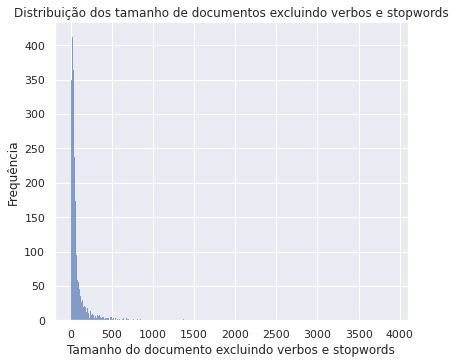

In [16]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo_sw', 
    xlabel="Tamanho do documento excluindo verbos e stopwords", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos excluindo verbos e stopwords")

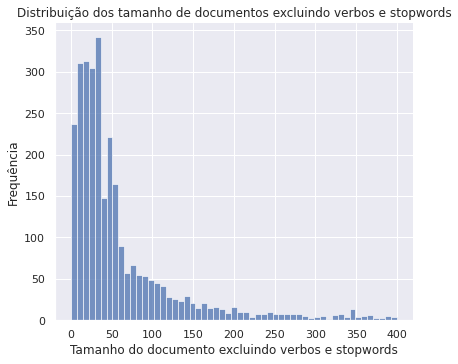

In [17]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo_sw', x_max=400, 
    xlabel="Tamanho do documento excluindo verbos e stopwords", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos excluindo verbos e stopwords")

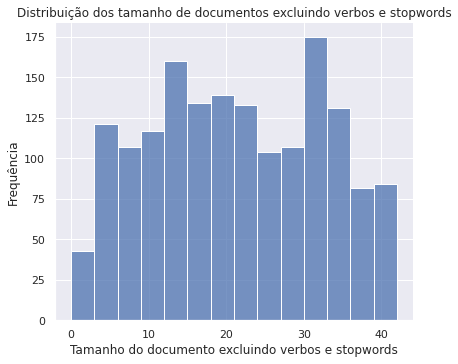

In [18]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo_sw', x_max=42, 
    xlabel="Tamanho do documento excluindo verbos e stopwords", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos excluindo verbos e stopwords")

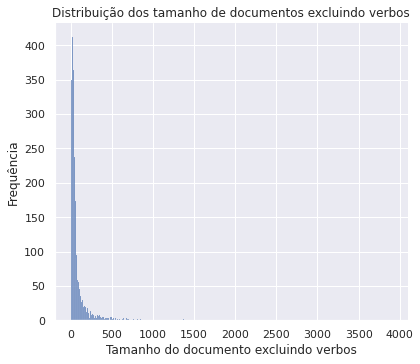

In [19]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo', 
    xlabel="Tamanho do documento excluindo verbos", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos excluindo verbos")

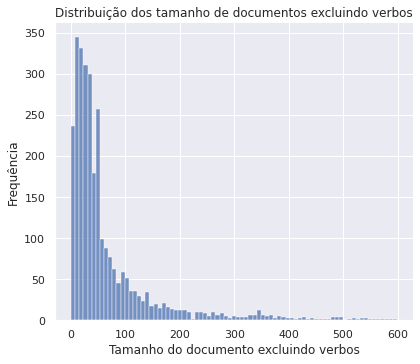

In [20]:
analise_grafica.analisar_distribuicao_tamanhos(indicador_tamanho='tamanho_sem_verbo', x_max=600, 
    xlabel="Tamanho do documento excluindo verbos", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos excluindo verbos")

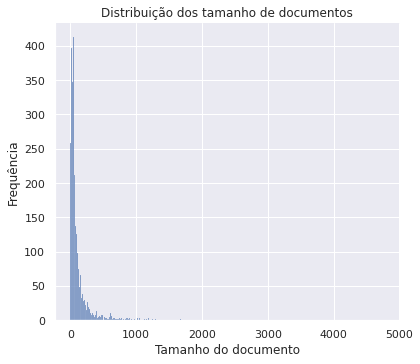

In [21]:
analise_grafica.analisar_distribuicao_tamanhos(xlabel="Tamanho do documento", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos")

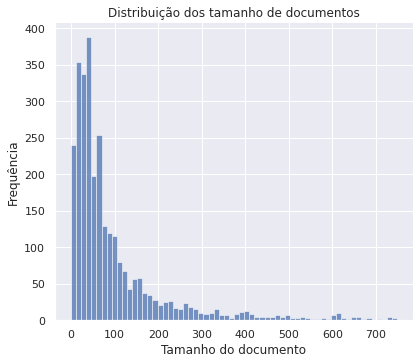

In [22]:
analise_grafica.analisar_distribuicao_tamanhos(x_max=750, xlabel="Tamanho do documento", ylabel="Frequência", 
    title="Distribuição dos tamanho de documentos")

## Análise estatística da fonte selecionada

In [23]:
analise_estatistica = AnaliseEstatisticaPalavras(informacoes_fonte_de_dados)

### Contagem geral de tokens

In [24]:
analise_estatistica.exibir_total_tokens('documento')

O total de tokens de todos os documentos para a coluna "documento" eh 469499


In [25]:
analise_estatistica.exibir_total_tokens('documento_nao_verbo')

O total de tokens de todos os documentos para a coluna "documento_nao_verbo" eh 291325


In [26]:
analise_estatistica.exibir_total_tokens('documento_nao_verbo_sw')

O total de tokens de todos os documentos para a coluna "documento_nao_verbo_sw" eh 291325


### Exibição de tokens mais frequentes

#### 10 tokens mais frequentes

In [27]:
print('10 Tokens mais comuns entre todos os tokens:')
analise_estatistica.exibir_tokens_mais_comuns('documento')

print('10 Tokens mais comuns eliminando os verbos:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo')

print('10 Tokens mais comuns eliminando os verbos e as stopwords customizadas:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo_sw')

10 Tokens mais comuns entre todos os tokens:
[('est', 3996), ('reg', 3551), ('áre', 3237), ('local', 2966), ('parqu', 2893), ('rio', 2765), ('brasil', 2543), ('part', 2367), ('grand', 2043), ('cidad', 1811)]
10 Tokens mais comuns eliminando os verbos:
[('áre', 3237), ('parqu', 2893), ('rio', 2765), ('brasil', 2543), ('grand', 2043), ('cidad', 1811), ('nacion', 1765), ('sul', 1762), ('popul', 1708), ('ano', 1565)]
10 Tokens mais comuns eliminando os verbos e as stopwords customizadas:
[('áre', 3237), ('parqu', 2893), ('rio', 2765), ('brasil', 2543), ('grand', 2043), ('cidad', 1811), ('nacion', 1765), ('sul', 1762), ('popul', 1708), ('ano', 1565)]


#### 20 tokens mais frequentes

In [28]:
print('20 Tokens mais comuns entre todos os tokens:')
analise_estatistica.exibir_tokens_mais_comuns('documento', n=20)

print('20 Tokens mais comuns eliminando os verbos:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo', n=20)

print('20 Tokens mais comuns eliminando os verbos e as stopwords customizadas:')
analise_estatistica.exibir_tokens_mais_comuns('documento_nao_verbo_sw', n=20)

20 Tokens mais comuns entre todos os tokens:
[('est', 3996), ('reg', 3551), ('áre', 3237), ('local', 2966), ('parqu', 2893), ('rio', 2765), ('brasil', 2543), ('part', 2367), ('grand', 2043), ('cidad', 1811), ('nacion', 1765), ('sul', 1762), ('popul', 1708), ('ilh', 1630), ('mai', 1605), ('nort', 1587), ('ano', 1565), ('argentin', 1507), ('outr', 1480), ('form', 1473)]
20 Tokens mais comuns eliminando os verbos:
[('áre', 3237), ('parqu', 2893), ('rio', 2765), ('brasil', 2543), ('grand', 2043), ('cidad', 1811), ('nacion', 1765), ('sul', 1762), ('popul', 1708), ('ano', 1565), ('argentin', 1507), ('outr', 1480), ('km²', 1467), ('águ', 1449), ('espéci', 1271), ('provínc', 1214), ('americ', 1144), ('tod', 1087), ('municípi', 1075), ('unid', 1039)]
20 Tokens mais comuns eliminando os verbos e as stopwords customizadas:
[('áre', 3237), ('parqu', 2893), ('rio', 2765), ('brasil', 2543), ('grand', 2043), ('cidad', 1811), ('nacion', 1765), ('sul', 1762), ('popul', 1708), ('ano', 1565), ('argentin'

### Descrição estatística dos tamanhos dos documentos

In [29]:
analise_estatistica.analisar_tamanhos_documentos()

            tamanho  tamanho_sem_verbo  tamanho_sem_verbo_sw
count   3016.000000        3016.000000           3016.000000
mean     155.669430          96.593170             96.593170
std      441.581739         257.269247            257.269247
min        0.000000           0.000000              0.000000
5%         8.000000           5.000000              5.000000
10%       15.000000          10.000000             10.000000
25%       29.000000          20.000000             20.000000
50%       58.000000          37.000000             37.000000
75%      123.000000          81.000000             81.000000
90%      306.000000         197.000000            197.000000
95%      598.000000         349.250000            349.250000
max    10018.000000        5699.000000           5699.000000


## Nuvem de palavras

In [30]:
analise_nuvem_palavras = AnaliseNuvemPalavras(informacoes_fonte_de_dados)

## Nuvem de palavras da fonte selecionada

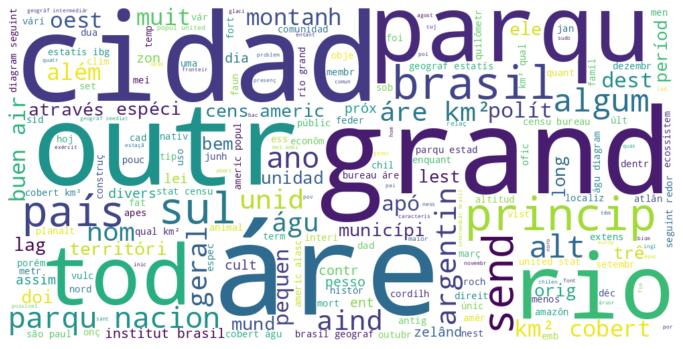

In [31]:
analise_nuvem_palavras.gerar_nuvem_palavras('documento_nao_verbo_sw')

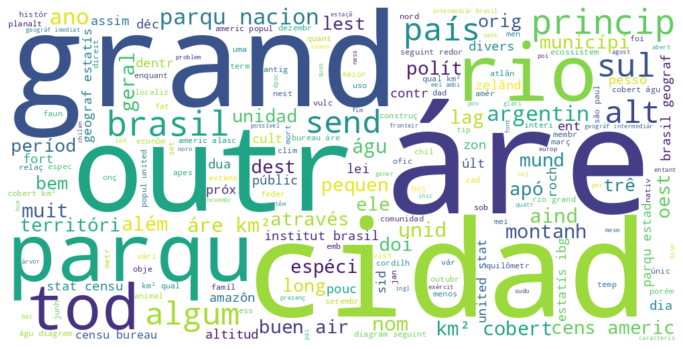

In [32]:
analise_nuvem_palavras.gerar_nuvem_palavras('documento_nao_verbo')

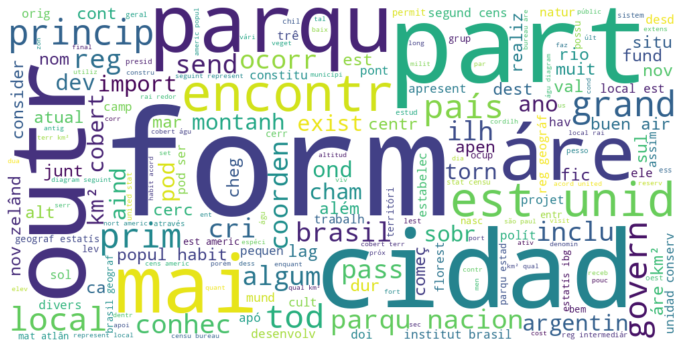

In [33]:
analise_nuvem_palavras.gerar_nuvem_palavras('documento')